# CA5 - Getting to know pytorch and neural networks
In this project, we are about to implement a neural network model and evaluate it by considering all the elements taking part in this highly-recommended classification method.
<br><br>

The code below will allow colab to access to the drive files in order to use the dataset that has been chosen for this project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive
# %mkdir AI
%cd AI/
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/AI
CA5_new.ipynb  categorized_products/


## Dataset
The dataset that has been used in this project, is a huge set of images showing different kind of clothes categorized in 52 different groups.
<br><br>

## Libraries
The key to use neural network as a tool in a convineint way, is to use `pytorch` library. As this library has a close relationship and its tensors(variables) can easily change into numpy arrays,  the `numpy` library playes an important role as well. To work better with these variables, `sklearn` and `operator` libraries will be used as well.
<br>
To show the results, the `time` and `matplotlib` library are the most common used tools. 

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img 

import time
from datetime import datetime
from datetime import timedelta

from operator import itemgetter
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split

## Converting input into Tensors
In order to take advantage of pytorch, it is needed to change the type of input into a readable type for pytorch functions. **Tensor** is the target type for this library. The `costum_to_tensor` function will do so by changing np arrays derived from images into tensors.
<br>
The `custom_normalized_to_tensor` function will do the same as well, but it will normalize the data (divide each R G B color to a number between 0 and 1) as well. This function will be used in part four.


In [4]:
class custom_to_tensor(object):
    
    def __call__(self, image):
        image = np.array(image, dtype=np.float32)
        return torch.from_numpy(image)

class custom_normalized_to_tensor(object):
    
    def __call__(self, image):
        image = np.array(image, dtype=np.float32)/255
        return torch.from_numpy(image)

The function `custom_imshow` is trying to plit images. This function is being used in part one.

In [5]:
def custom_imshow(img_array, labels, classes):
    _, axs = plt.subplots(2, 6, figsize=[25,15]) 
    for i in range(2):
      for j in range(6):
        image_int = np.array(img_array[i * 6 + j], dtype=int)
        axs[i][j].imshow(image_int)
        axs[i][j].set_title(classes[labels[i * 6 + j]])
        axs[i][j].axis('off')
    plt.show()

## Creating Dataset
To create a dataset which is usable for pytorch, first, it is needed to have some transforms on raw input. The `transform.compose` function will create a transform which covers the needed factors. In this project, the images will be observed in black and white. So, this transform will include both `custom_to_tensor` and `grayscale` transforms. Finally, the images are being read by `ImageFolder` function and being transformed in the way we had described in **transform**. Note that in this part, the grayscale transform is not being used as we want to print the pictues first.

In [ ]:
transform = transforms.Compose([custom_to_tensor()]) 
dataset = ImageFolder( root="./categorized_products", transform=transform)

## Part One
In this part, we are about to print an image from 12 unique categories. In order to do so, it is needed to iterate the Dataset. For iterating in pytorch, a **loader** is the key part. With a batch size of 64, the dataset is being iterated; and then, by taking advantage of dictionary having O(1) access time, 12 unique imaged will be found as soon as possible. Finally, by calling `custom_imshow` that had been explained before, the images are being printed.

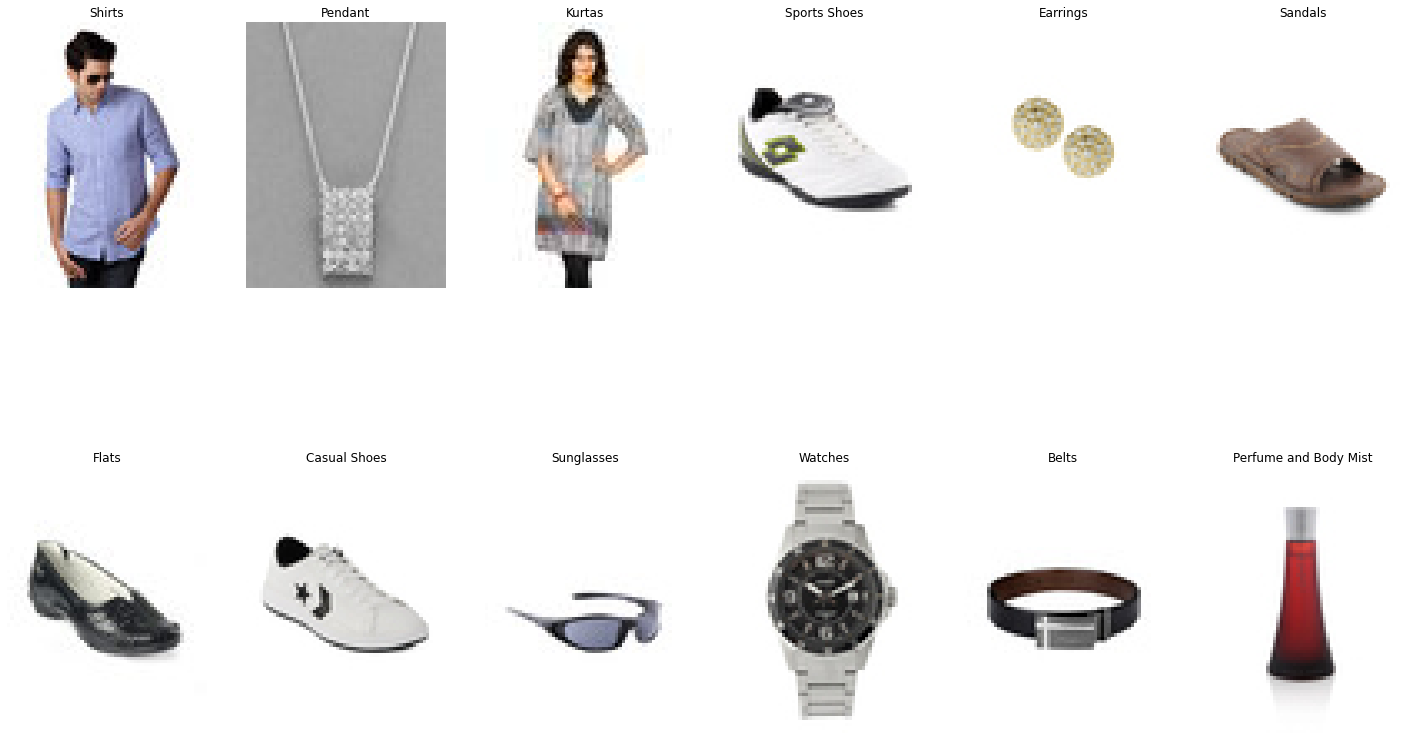

In [ ]:
batch_size = 64
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=16, shuffle=True)
data_iter = iter(loader)
data_iter.next()
images, labels = data_iter.next()
np_labels= labels.numpy()
classes = dataset.classes
new_detected = 0
unique_img, unique_labels = [], []

dict = {i:0 for i in range(len(classes))}
for i in range(len(images)):
  if new_detected >= 12:
    break
  
  if dict[np_labels[i]] == 0:
    dict[np_labels[i]] += 1
    unique_img.append(images[i])
    unique_labels.append(labels[i])
    new_detected += 1

custom_imshow(unique_img, unique_labels, classes)

## Part Two - A
In this part, we are about to show the numbers of each category using a bar chart. The chart has been sorted from high to low. By zipping the number of each class with its name, the data had been sorted before plotting, and then, the chart has been plotted using `matplotlib` library.

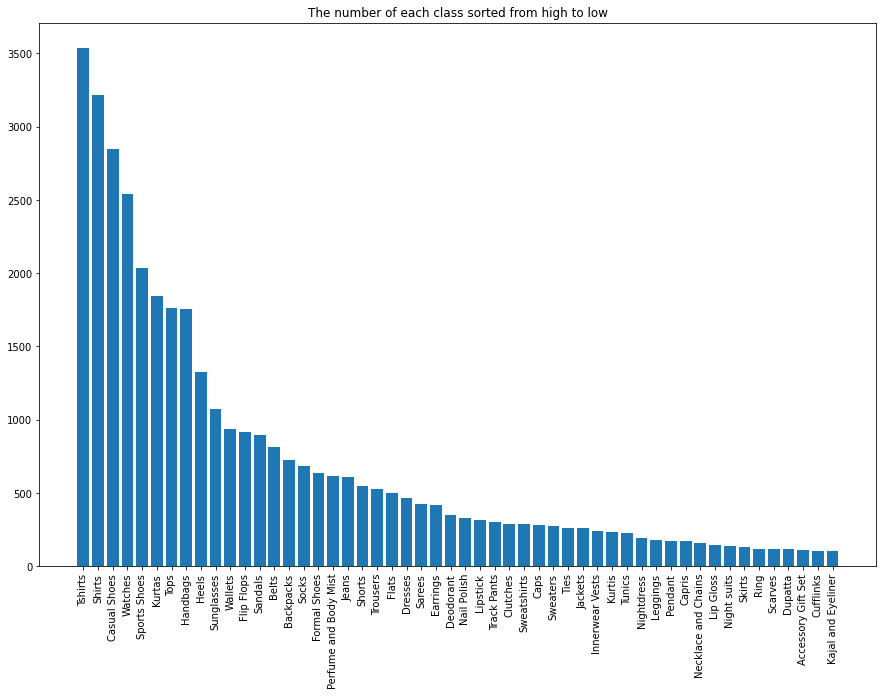

In [ ]:
classes = dataset.classes
y = np.array(list(map(itemgetter(1), dataset.imgs)))
dict1 = {i : 0 for i in range(len(classes))}
for i in range(len(y)):
  dict1[y[i]] += 1

ans = [dict1[i] for i in range(len(dict1))]
ans, classes = (list(t) for t in zip(*sorted(zip(ans, classes), reverse=True)))


plt.figure(figsize=[15,10])
p1 = plt.bar(classes, ans)
plt.xticks(rotation='vertical')
plt.title('The number of each class sorted from high to low')
plt.show()

## Part Two - B
In this part we are about to split input data into test and train parts. The importance is that we want to have exactly 20 percent of each category in test data and 80 percent in train data. In order to do so, the `test_train_split` function from `sklearn` library has been used. This function has a flag called **stratify** that has been set to labels or name of categories; in this way, the function will cut 20 percent of each class and puts it in its test data. Next, the data will be shuffled to prevent having the same class in each batch that will be used later. Finally, a loader will be created from test and train data by: <br> 
> **1.** using `SubsetRandomSampler` to separate test indices from train indices.
> <br>
> **2.** using `DataLoader` function to convert samplers into loader to be iterable for pytorch.
>
<br>
These loaders will be returned after this.

In [6]:
def get_test_train_loader(dataset, batch_size=64):

    validation_split = 0.2
    classes = dataset.classes

    indices = list(range(len(dataset))) 
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=16)

    y = np.array(list(map(itemgetter(1), dataset.imgs)))
  
    X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, stratify=y, test_size=0.2)

    np.random.shuffle(X_train)
    np.random.shuffle(X_test)

    train_sampler = SubsetRandomSampler(list(X_train))
    test_sampler = SubsetRandomSampler(list(X_test))
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=16)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=16)

    return train_loader, test_loader

## Prerequisits for remaining parts
As we are using neural networks from now on, it is needed to define some classes and function in order to create, evaluate, and show the results. The needed function has been defined, and also explained below.
<br>
### `model` 
Using this class, a multi-layer neural network will be defined to be used in later parts. This model has 5 layer(containing 3 inner layers). the **Relu** function is being used as its activation function.
<br>
The `forward` function of this class, passes data from different layers and creates the output. Note that after passing each layer, the **Relu** function will be called(except the very last layer).
<br>

In [7]:
class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):
        super(Model, self).__init__()

        self.act = act
        
        # self.layer1 = nn.Linear(4800, 8192)
        self.layer1 = nn.Linear(1*60*80, 4*80*100)
        
        # self.layer2 = nn.Linear(8192, 2048)
        self.layer2 = nn.Linear(4*80*100, 2*60*80)
        
        # self.layer3 = nn.Linear(2048, 512)
        self.layer3 = nn.Linear(2*60*80, 2*50*40)

        self.layer4 = nn.Linear(2*50*40, 1*25*20)
        # self.layer4 = nn.Linear(512, class_num)

        self.layer5 = nn.Linear(1*25*20, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.act(self.layer3(x))
        x = self.act(self.layer4(x))
        x = self.layer5(x)
    
        return x

### `fit`
This function is being used as the main part of training. In this function, the model will be trained for 10 times(number of epochs). In each epoch, by calculating loss and taking advantage of backward propagation, the weights will be updated and after all, the loss for each epoch will be returned.

In [8]:
def fit(model, train_loader, device, criterion, optimizer, num_epochs=10):
  loss_array = []
  total_time = 0.

  for epoch in range(num_epochs):
      train_loss = 0.
      d1 = datetime.now()
      for images, labels in train_loader:

          
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images.float())

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()

      average_loss = train_loss / len(train_loader)
      d2 = datetime.now()
      delta = d2 - d1
      seconds = float(delta.total_seconds())
      total_time += seconds
      loss_array.append(average_loss)
      print('epoch %d, train_loss: %.3f, time elapsed: %s seconds' % (epoch + 1, average_loss, seconds))
  print('total training time: %.3f minutes' % (total_time / 60))
  return loss_array

### `evaluation`
This function plays a key role in our examinations. Using this, firstly a model will be initiated and then, by applying the changes if necessary(whether the initial weights are random or are zero) the model will be given to a GPU with `cuda` function. Next, the final model will be calculated using `fit` function explaned before, and the parameters will be optimized using **stochastic gradient descent** method (`SGD` function). 
<br>
At last, the accuracy and recall will be calculated using the functions defined here.

In [9]:
def evaluation(train_loader, test_loader, learning_rate=0.01, zero_start=False, momentum=0, num_epochs=10, act=F.relu, weight_decay=0):
  model = Model(52, act)

  if zero_start:
    torch.nn.init.zeros_(model.layer1.weight)
    torch.nn.init.zeros_(model.layer2.weight)
    torch.nn.init.zeros_(model.layer3.weight)
    torch.nn.init.zeros_(model.layer4.weight)
    torch.nn.init.zeros_(model.layer5.weight)
    
    model.layer1.bias.data.fill_(0.0)
    model.layer2.bias.data.fill_(0.0)
    model.layer3.bias.data.fill_(0.0)
    model.layer4.bias.data.fill_(0.0)
    model.layer5.bias.data.fill_(0.0)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
  loss = fit(model, train_loader, device, criterion, optimizer, num_epochs=num_epochs)

  test_acc = test_model_accuracy(model, device, test_loader)
  train_acc = test_model_accuracy(model, device, train_loader)

  train_recall = calc_recall(model, device, train_loader)
  test_recall = calc_recall(model, device, test_loader)

  print_result(train_recall, test_recall, loss, train_acc, test_acc, dataset.classes, num_epochs)

  # return model

 ### `test_model_accuracy`
 This function will calculate the accuracy of the trained model by dividing the number of correct predictions to the total number of predictions.

In [10]:
def test_model_accuracy(model, device, test_loader):
    correct = 0.
    total = 0.
    with torch.no_grad():
      for images, labels in test_loader:
        outputs = model(images.to(device).float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()


    accuracy = 100 * correct / total
    # print('Accuracy: {}%'.format(accuracy))
    return accuracy

### `calc_recall`
This function calculates the recall of the input by dividing the correct predictions to the whole number of elements of that specific class (seperately for each class). The code is kind of similar to the former function(calculate accuracy).

In [11]:
def calc_recall(model, device, loader):
  
  num_of_classes = 52
  predicted_actual = np.zeros(num_of_classes)
  predicted_correct = np.zeros(num_of_classes)

  with torch.no_grad():
    for images, labels in loader:
      outputs = model(images.to(device).float())
      _, predicted = torch.max(outputs.data, 1)
      
      for index in range(num_of_classes):
        predicted_actual[index] += (labels == index).sum().item()
        predicted_correct[index] += ((predicted.to('cpu') == index) * (labels == index)).sum().item()

  np.seterr(divide='ignore', invalid='ignore')
  return 100 * predicted_correct/predicted_actual

### `print_result`
This function simply uses `matplotlib` library in order to print the outputs (recall, accuracy ,and loss). 

In [12]:
def print_result(train_recall, test_recall, loss, train_acc, test_acc, classes, num_epoch):
    
  to_print = "| Train Accuracy | Test Accuracy |\n" + "|---|---|\n"
  to_print += "| " + f"{train_acc}" +  "|" + f"{test_acc}" + "|\n"
  display(Markdown(to_print))

  plt.figure(figsize=[8,8])
  plt.plot([i for i in range(1,num_epoch+1)], loss)
  plt.title('loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  x = np.arange(len(classes))
  width = 0.35

  fig, ax = plt.subplots(figsize=[15,10])
  rects1 = ax.bar(x - width/2, test_recall, width, label='test_recall')
  rects2 = ax.bar(x + width/2, train_recall, width, label='train_recall')

  ax.set_ylabel('recall')
  ax.set_xlabel('classes')
  ax.set_title('Recall')
  ax.set_xticks(x)
  ax.set_xticklabels(classes, rotation='vertical')
  ax.legend()
  
  fig.tight_layout()
  plt.show()

## Part Three
In this part, a neural network model should be designed to classify images. The `model` class that has been defined before, is a 5-layer network which will be trained to classify these images. The dimensions of this model has been explained back in the *prerequisits* part of the report. The dimensions of the first layer, should multiply to the input image. As the input image has the dimension of 1\*60\*80 , the dimensions of the first layer should be (1\*60\*80) * (some dimesnsion bigger than the picture).
<br>
The inner layers can have different values. However, the last layer should indicate one of 52 different categories, so the dimension of the last layer should be (something different)\*52.
<br>
A table of all the weights and their relation with total number of parameters has been shown below in the table.

|  | Weight parameters | Bias parameters |
|---|---|---|
| Layer1 | (1\*60\*80)\*(4\*80\*100) | 4\*80\*100 |
| Layer2 | (4\*80\*100)\*(2\*60\*80) | 2\*60\*80 |
| Layer3 | (2\*60\*80)\*(2\*50\*40) | 2\*50\*40 |
| Layer4 | (2\*50\*40)\*(1\*25\*20) | 1\*25\*20 |
| Layer5 | (1\*25\*20)*52 | 52 |

The number of parameters have been claculated by the code below. It can be seen that they are exactly the multiplication of the input dimestions and the output dimensions.

In [13]:
model = Model(52)
i = 0
to_print = '| Layer | Weight parameters | Bias parameters | \n' + '|---|---|---|\n'
for p in model.parameters():
  if i%2 == 0:
    to_print += ('|' + str(int(i/2)+1) + '|')
    # print('Layer', int(i/2)+1, ': ')
    to_print += (str(p.numel()) + '|')
    # print('weights:', p.numel(), end = '   ')
  else:
    to_print += (str(p.numel()) + '|\n')
    # print('bias:', p.numel())
  i+=1
display(Markdown(to_print))

| Layer | Weight parameters | Bias parameters | 
|---|---|---|
|1|153600000|32000|
|2|307200000|9600|
|3|38400000|4000|
|4|2000000|500|
|5|26000|52|


Finally, by using the evaluation` function explained in  *prerequisits*, a model with the parameters explained in the project, will be examined(learning rate of 0.01 and batch size of 64). The results have been shown below.
<br>
The results are showing a **nan** value for train loss, and hence, the system is not training in the way it should. The problem is that using the values between 0 to 255 for gray and white pictures, the value of loss is kind of growing exponentially, and soon, the value will be big enough to exceed the limits of a float variable, and becomes nan value.

In [14]:
transform = transforms.Compose([transforms.Grayscale(), custom_to_tensor()]) 
dataset = ImageFolder( root="./categorized_products", transform=transform)

train_loader, test_loader = get_test_train_loader(dataset, batch_size=64)

epoch 1, train_loss: nan, time elapsed: 1316.192186 seconds
epoch 2, train_loss: nan, time elapsed: 94.658254 seconds
epoch 3, train_loss: nan, time elapsed: 94.635088 seconds
epoch 4, train_loss: nan, time elapsed: 94.471845 seconds
epoch 5, train_loss: nan, time elapsed: 94.510027 seconds
epoch 6, train_loss: nan, time elapsed: 94.255012 seconds
epoch 7, train_loss: nan, time elapsed: 94.568708 seconds
epoch 8, train_loss: nan, time elapsed: 94.548346 seconds
epoch 9, train_loss: nan, time elapsed: 94.330769 seconds
epoch 10, train_loss: nan, time elapsed: 94.526772 seconds
total training time: 36.112 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 0.29866774052820566|0.2953020134228188|


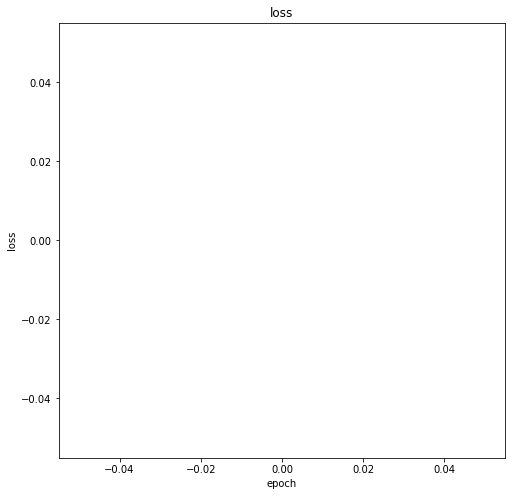

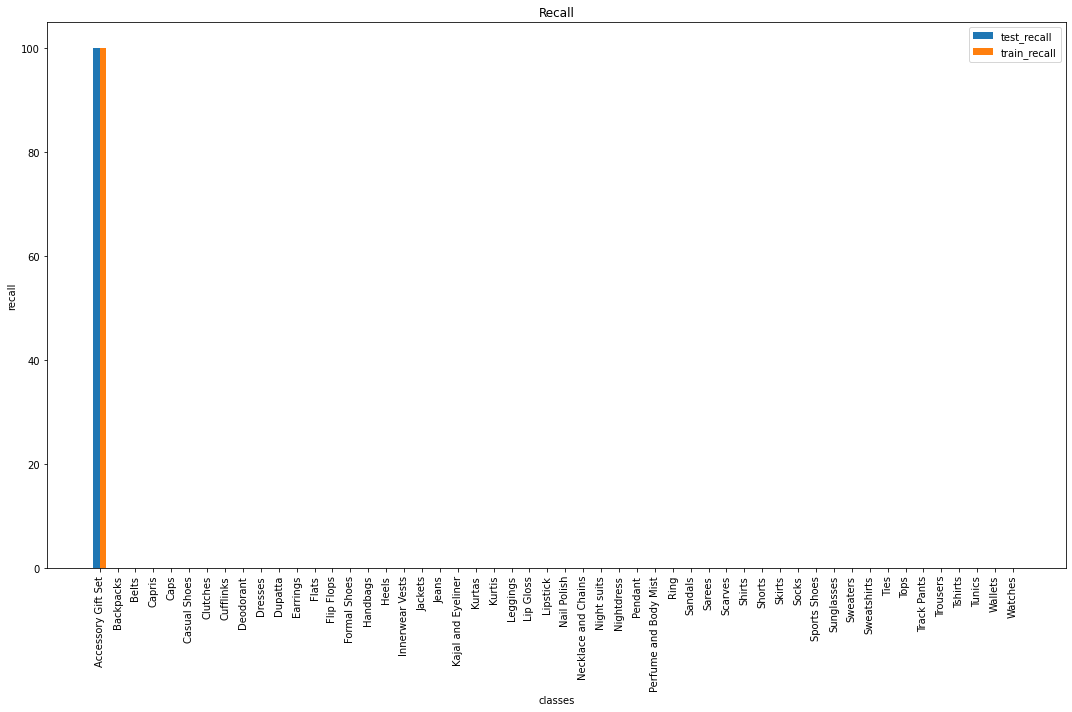

In [15]:
evaluation(train_loader, test_loader)

## Part Four
In this part, we are about to normalize the input data. In order to do, a function called `custom_normalized_to_tensor` has been defined that is the exact same of `custom_to_tensor` function, with the difference of dividing data to 255 before saving it. As the RGB data is between 0 and 255, by diving it to 255, we are changing it into a number between 0 and 1.
<br>
The results of implementing this transform on the dataset, have been shown below. The *nan* loss problem has been solved after applying the normalized data. Thus, the accuracy has been increased by using this new dataset.

In [16]:
transform = transforms.Compose([transforms.Grayscale(), custom_normalized_to_tensor()]) 
dataset = ImageFolder( root="./categorized_products", transform=transform)

train_loader, test_loader = get_test_train_loader(dataset, batch_size=64)

epoch 1, train_loss: 3.226, time elapsed: 96.463932 seconds
epoch 2, train_loss: 2.433, time elapsed: 97.051013 seconds
epoch 3, train_loss: 1.957, time elapsed: 97.092512 seconds
epoch 4, train_loss: 1.702, time elapsed: 97.00133 seconds
epoch 5, train_loss: 1.544, time elapsed: 97.163235 seconds
epoch 6, train_loss: 1.432, time elapsed: 96.924264 seconds
epoch 7, train_loss: 1.354, time elapsed: 97.139916 seconds
epoch 8, train_loss: 1.293, time elapsed: 97.039795 seconds
epoch 9, train_loss: 1.238, time elapsed: 97.222582 seconds
epoch 10, train_loss: 1.195, time elapsed: 97.454387 seconds
total training time: 16.176 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 61.40138930836605|60.16107382550336|


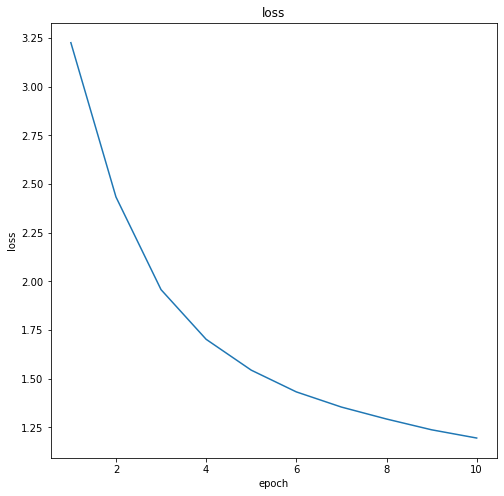

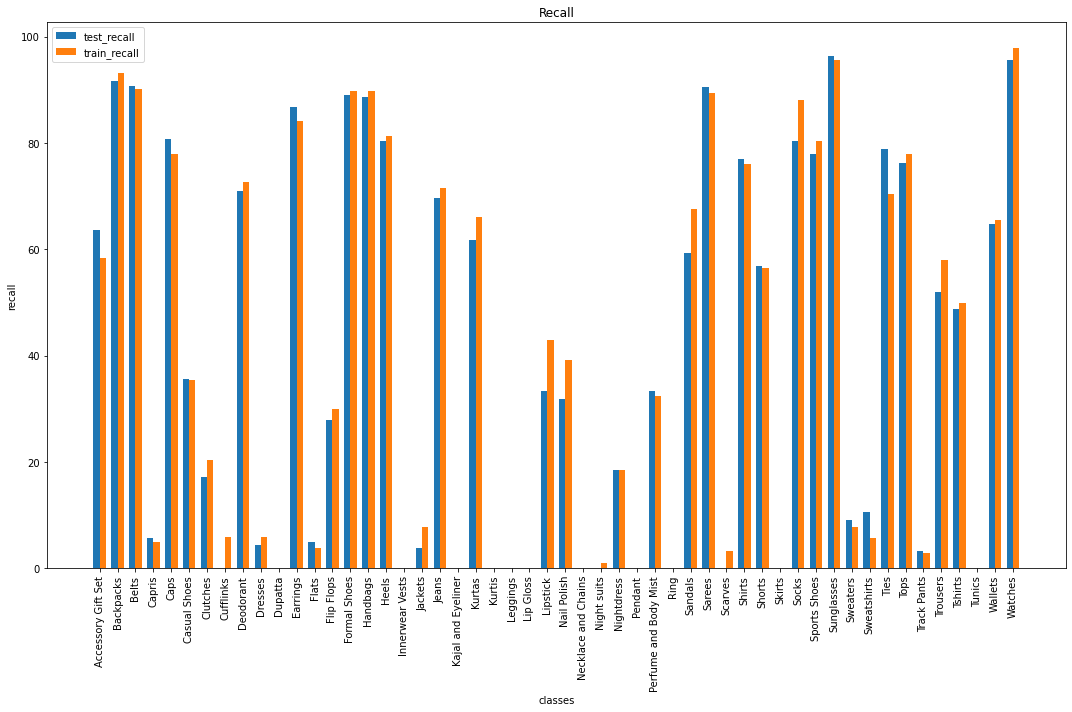

In [17]:
evaluation(train_loader, test_loader)

## Part Five
In this part we are about to set the initial value of each parameter to 0. The problem is that the weights are changing using back propagation which involves many mulstiplications. By using zero value at first, the updating values will be set to zero as well, and as a result the weights will not be updated except the last layer. The results of this situation has been shown below, indicating that this understanding was completely true.
<br>
For the coding part, there is a flag called *zero_start* which enables the `evaluation` function to set all the initial values to zero using `init.zeros_` function of pytorch.

### Better ways to initialize
> There are two problems in initializations. Fisrtly,  the higher the initial values are, the higher the value of parameters will be; and evemtually, the values will lead to have nan values as they get bigger and bigger. 
> <br>
> Secondly, if the initial values are too low, the final parameters will be low enough to consider as zero values.
> <br>
> **Any solutions?**
>> In order to tackle this problems, there are ways that have been introduced lately, from which we can refer to He and Xavier initializations. These methods are taking advantage of multiplying the random values to *$\sqrt{\frac{1}{layer \ size}}$*, accordingly defining proper initial values for each layer individually.
>> 
> <br>

epoch 1, train_loss: 3.896, time elapsed: 94.295239 seconds
epoch 2, train_loss: 3.798, time elapsed: 94.25571 seconds
epoch 3, train_loss: 3.720, time elapsed: 94.298306 seconds
epoch 4, train_loss: 3.661, time elapsed: 94.270791 seconds
epoch 5, train_loss: 3.616, time elapsed: 94.307774 seconds
epoch 6, train_loss: 3.582, time elapsed: 94.104613 seconds
epoch 7, train_loss: 3.557, time elapsed: 94.261181 seconds
epoch 8, train_loss: 3.538, time elapsed: 93.968398 seconds
epoch 9, train_loss: 3.524, time elapsed: 94.107503 seconds
epoch 10, train_loss: 3.512, time elapsed: 94.156051 seconds
total training time: 15.700 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 9.48689553340716|9.48993288590604|


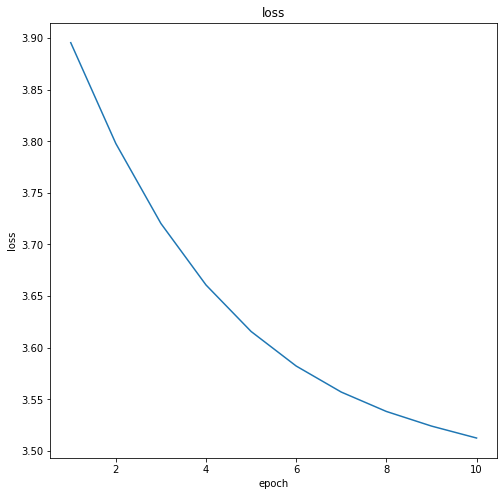

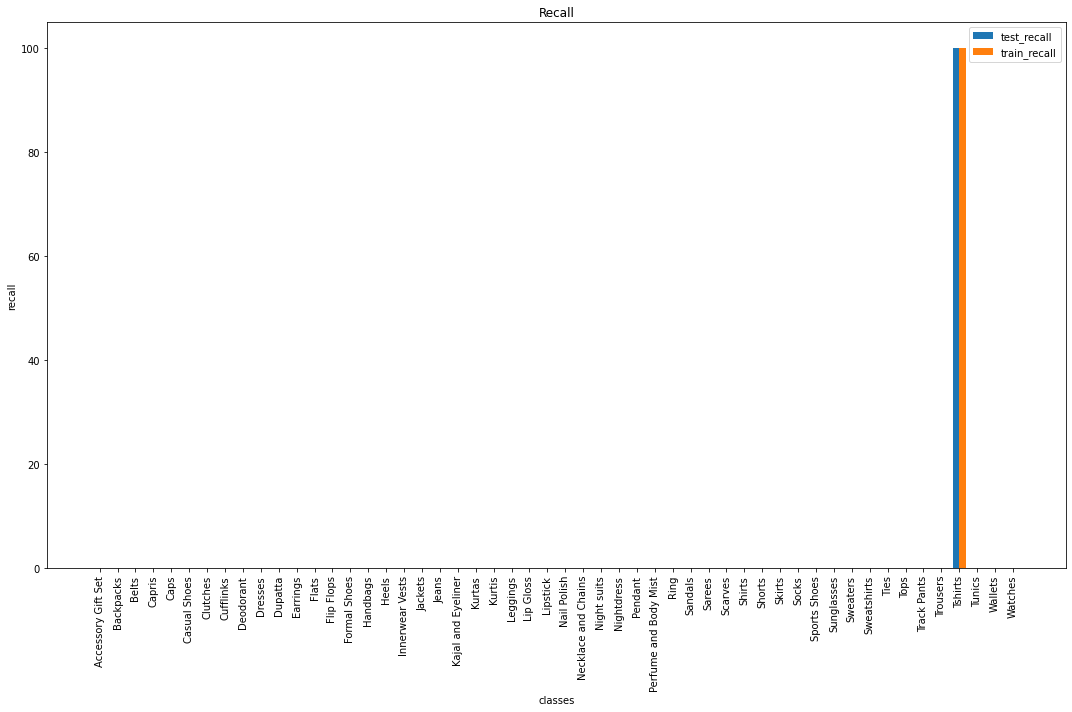

In [18]:
model = evaluation(train_loader, test_loader, zero_start=True)

## Part Six

In this part we are about to find the desired learning rate for this specific problem. To do so, we have examined the system with learning rates of $[0.001, 0.005, 0.01, 0.05, 0.1]$ . The result shows that the best learning rate for this classification issue is $0.05%. So, we tend to ude this learning rate from now on. The results for a learning rate of $0.05$ have been shown below.
<br> 

#### *learning* *rate* = $0.05$

epoch 1, train_loss: 2.653, time elapsed: 96.687793 seconds
epoch 2, train_loss: 1.827, time elapsed: 97.001193 seconds
epoch 3, train_loss: 1.496, time elapsed: 97.252585 seconds
epoch 4, train_loss: 1.334, time elapsed: 97.015049 seconds
epoch 5, train_loss: 1.241, time elapsed: 97.394495 seconds
epoch 6, train_loss: 1.157, time elapsed: 97.24676 seconds
epoch 7, train_loss: 1.079, time elapsed: 96.946847 seconds
epoch 8, train_loss: 1.033, time elapsed: 97.04975 seconds
epoch 9, train_loss: 0.983, time elapsed: 97.139636 seconds
epoch 10, train_loss: 0.940, time elapsed: 97.31597 seconds
total training time: 16.184 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 67.5727373401792|65.51677852348993|


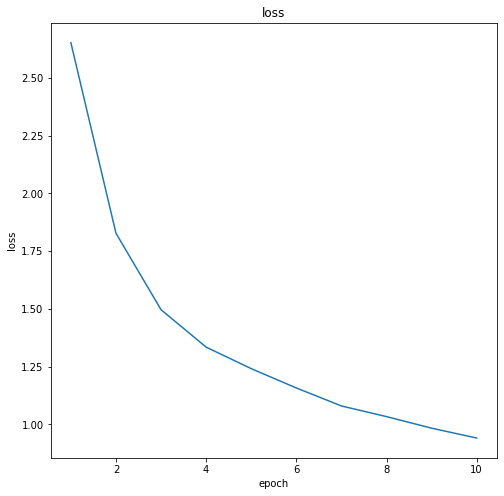

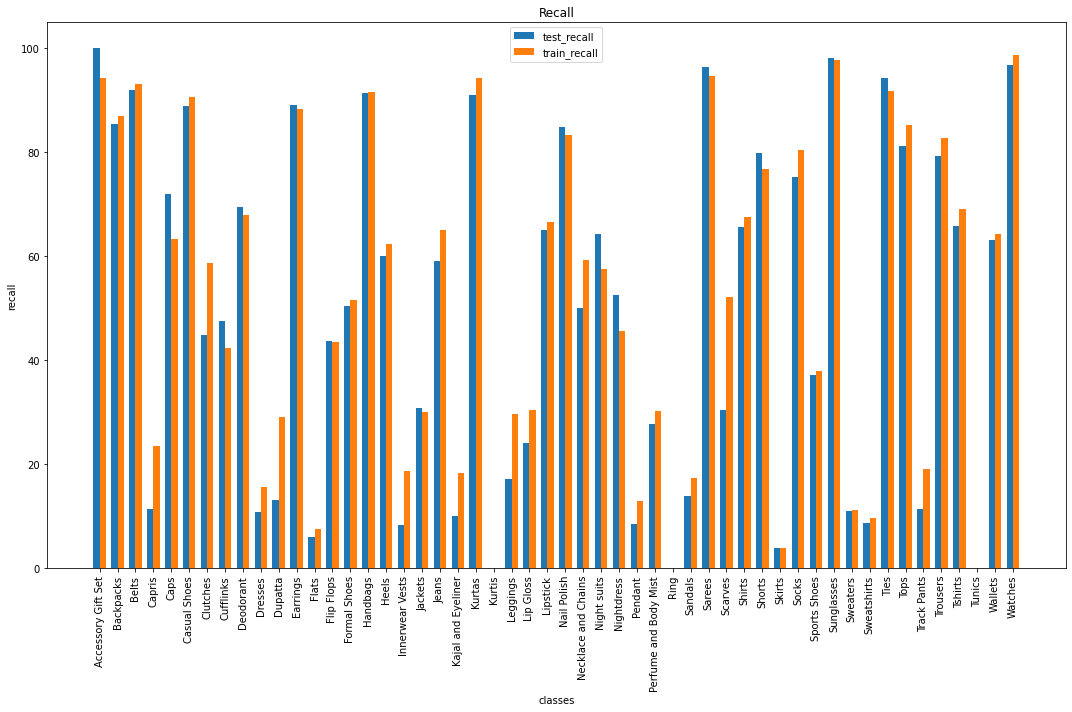

In [19]:
evaluation(train_loader, test_loader, learning_rate=0.05)

### Different learning rates and how they work 
The learning rate in machine learning indicates how fast we move throupgh search space. This parameter in learning is like a trade off:
<br>
> If the learning rate becomes too high, we can either move towards the goal faster or maybe take a too large step and skip the optimum place. So, the learning rate can not be too high. <br>
> At the same time, if we set the learning rate to a very small number, it might take us a long time to reach the answer, with the effect of losing efficiency. <br>
> All in all, it is tricky to find the best value possible for our learning rate. <br>
>
The results for a learning rate of $0.1$ and $0.001$ have been shown below.
<br>
#### *learning* *rate* = $0.1$

epoch 1, train_loss: 2.756, time elapsed: 96.741335 seconds
epoch 2, train_loss: 2.087, time elapsed: 96.816204 seconds
epoch 3, train_loss: 1.725, time elapsed: 96.61903 seconds
epoch 4, train_loss: 1.499, time elapsed: 96.879545 seconds
epoch 5, train_loss: 1.393, time elapsed: 96.80096 seconds
epoch 6, train_loss: 1.239, time elapsed: 96.74195 seconds
epoch 7, train_loss: 1.148, time elapsed: 96.36529 seconds
epoch 8, train_loss: 1.082, time elapsed: 96.50814 seconds
epoch 9, train_loss: 1.031, time elapsed: 96.567541 seconds
epoch 10, train_loss: 0.982, time elapsed: 96.546152 seconds
total training time: 16.110 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 66.87137152253432|64.81879194630872|


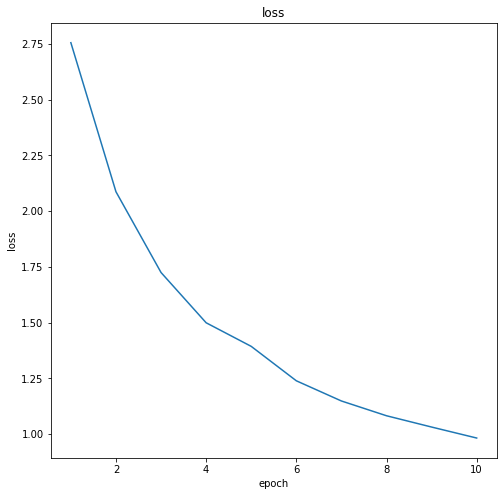

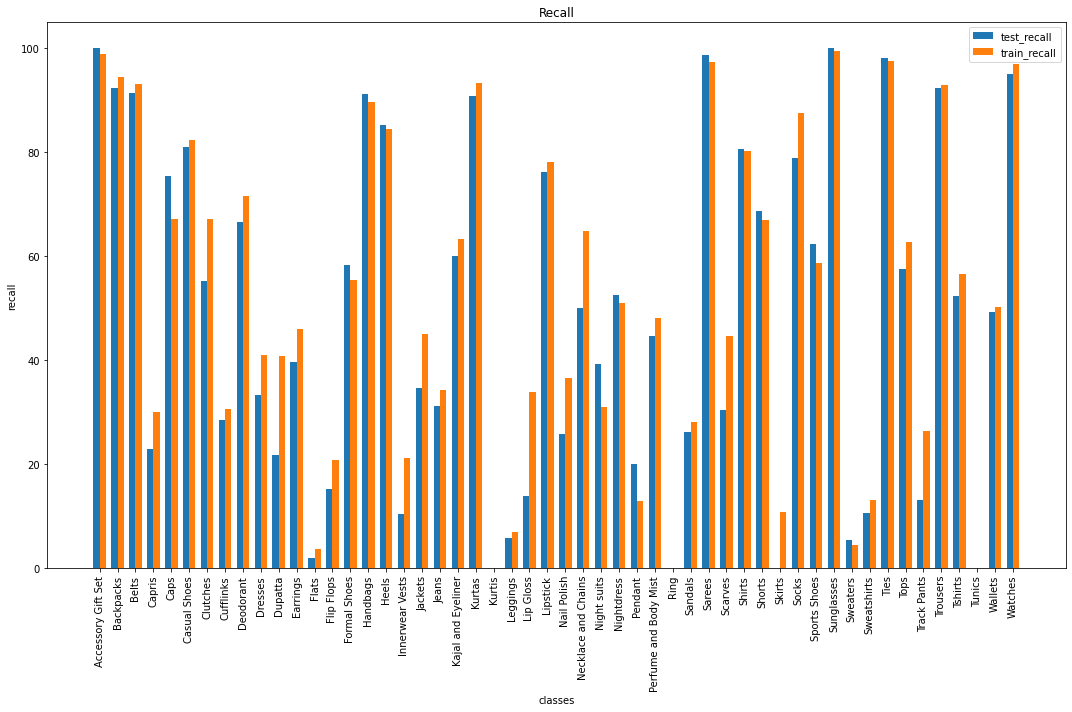

In [20]:
evaluation(train_loader, test_loader, learning_rate=0.1)

#### *learning* *rate* = $0.001$

epoch 1, train_loss: 3.793, time elapsed: 96.687158 seconds
epoch 2, train_loss: 3.476, time elapsed: 96.997661 seconds
epoch 3, train_loss: 3.423, time elapsed: 96.774205 seconds
epoch 4, train_loss: 3.382, time elapsed: 96.740827 seconds
epoch 5, train_loss: 3.313, time elapsed: 96.750108 seconds
epoch 6, train_loss: 3.187, time elapsed: 96.730004 seconds
epoch 7, train_loss: 3.032, time elapsed: 96.565628 seconds
epoch 8, train_loss: 2.904, time elapsed: 96.685507 seconds
epoch 9, train_loss: 2.801, time elapsed: 96.687437 seconds
epoch 10, train_loss: 2.709, time elapsed: 96.636118 seconds
total training time: 16.121 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 25.880063089365414|25.86577181208054|


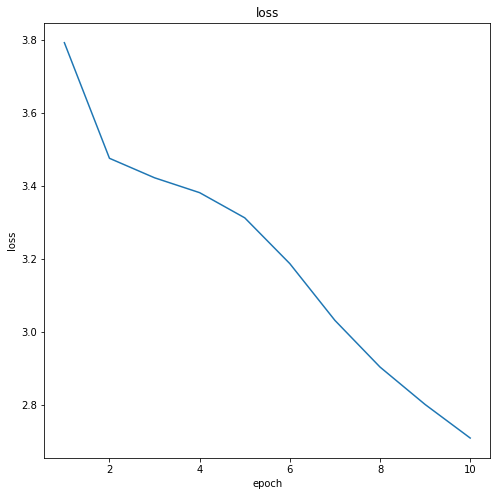

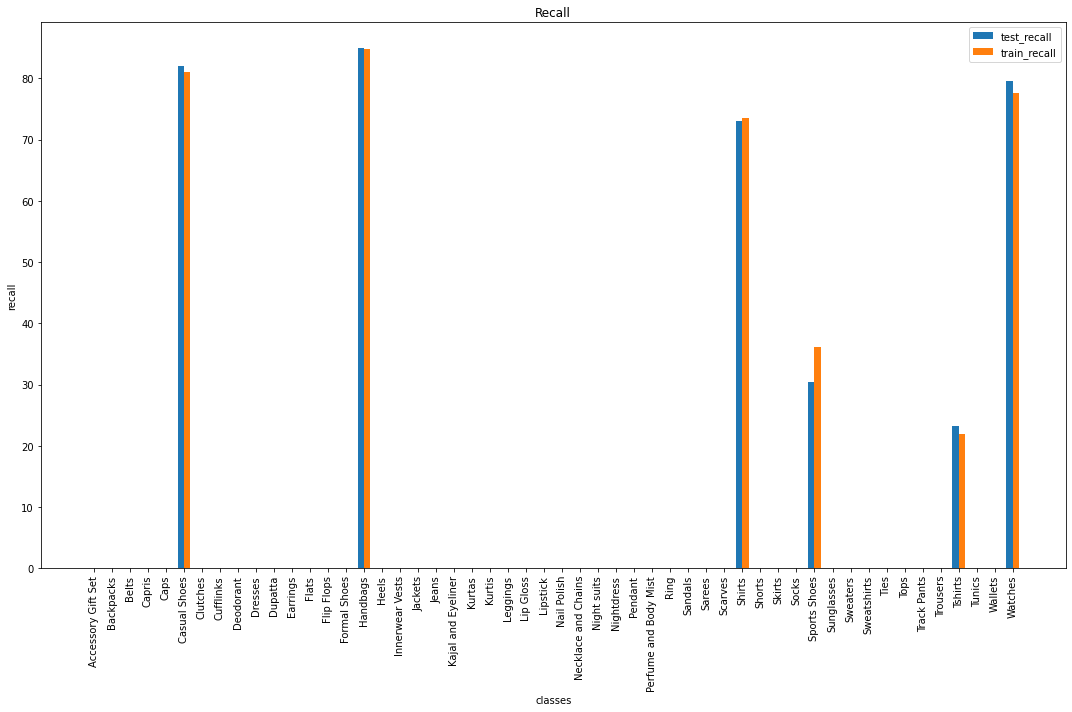

In [21]:
evaluation(train_loader, test_loader, learning_rate=0.001)

## Part Seven
In this part, we are about to examine the role of batch size in a neural network modeling system. In order to do so, the loaders have been changed into loaders with $32$ and $128$ batch size. <br>
First of all, the higher batch size (128) tends to work faster than the lower one(32) as it can take advantage of parallelism in GPUs. It should be noted that the higher the batch size, the higher the chance of weakening the generalization of the system. If the batch size is too large, the system will have no generalization at all.
<br>
On the other side of this debate, smaller batch sizes tend to converge faster as they change the values more in a single epoch. More importantly, small batch sizes need a lot of time waiting for the result. Moreover, these batch sizes are mostly noisy, so the final result will have a margin and may be not precise enough.
<br>
The results of a system with batch sizes of $128$ and $32$ have been shown below.


#### Batch size = $128$

In [22]:
train_loader, test_loader = get_test_train_loader(dataset, batch_size=128)

epoch 1, train_loss: 2.989, time elapsed: 70.531482 seconds
epoch 2, train_loss: 2.139, time elapsed: 71.107476 seconds
epoch 3, train_loss: 1.817, time elapsed: 70.850843 seconds
epoch 4, train_loss: 1.582, time elapsed: 71.168375 seconds
epoch 5, train_loss: 1.453, time elapsed: 70.776163 seconds
epoch 6, train_loss: 1.337, time elapsed: 70.764637 seconds
epoch 7, train_loss: 1.269, time elapsed: 71.173186 seconds
epoch 8, train_loss: 1.214, time elapsed: 70.953231 seconds
epoch 9, train_loss: 1.166, time elapsed: 71.116894 seconds
epoch 10, train_loss: 1.098, time elapsed: 72.535307 seconds
total training time: 11.850 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 57.69656699889258|56.75167785234899|


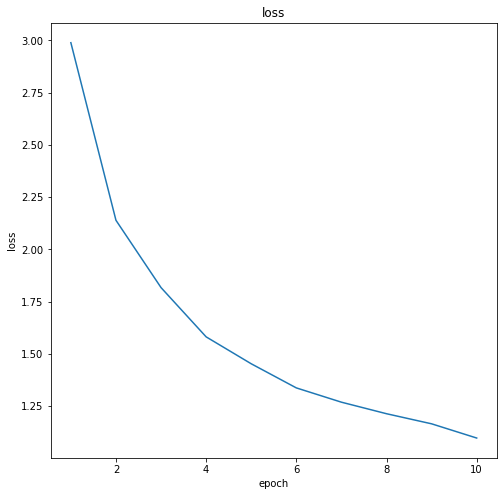

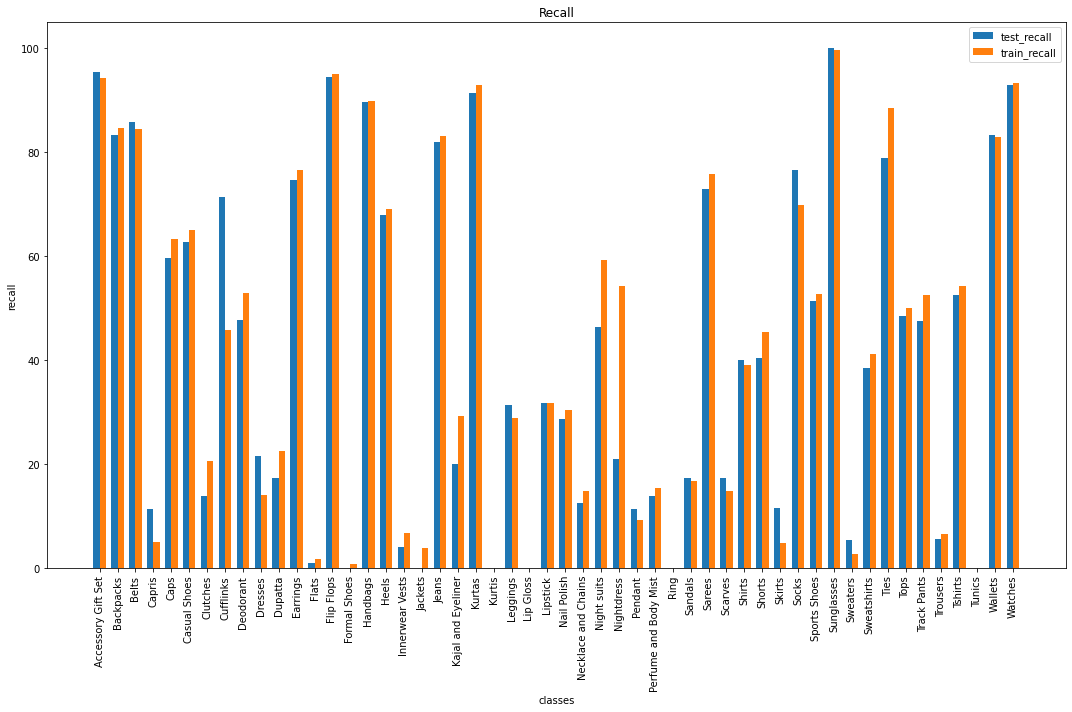

In [23]:
evaluation(train_loader, test_loader, learning_rate=0.05)

#### Batch size = $32$

epoch 1, train_loss: 2.382, time elapsed: 177.177276 seconds
epoch 2, train_loss: 1.580, time elapsed: 177.175432 seconds
epoch 3, train_loss: 1.347, time elapsed: 177.266493 seconds
epoch 4, train_loss: 1.207, time elapsed: 177.274833 seconds
epoch 5, train_loss: 1.097, time elapsed: 177.222595 seconds
epoch 6, train_loss: 1.037, time elapsed: 177.15636 seconds
epoch 7, train_loss: 0.972, time elapsed: 177.285583 seconds
epoch 8, train_loss: 0.936, time elapsed: 177.209644 seconds
epoch 9, train_loss: 0.891, time elapsed: 177.158456 seconds
epoch 10, train_loss: 0.848, time elapsed: 177.261707 seconds
total training time: 29.536 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 62.3141716164972|60.22818791946309|


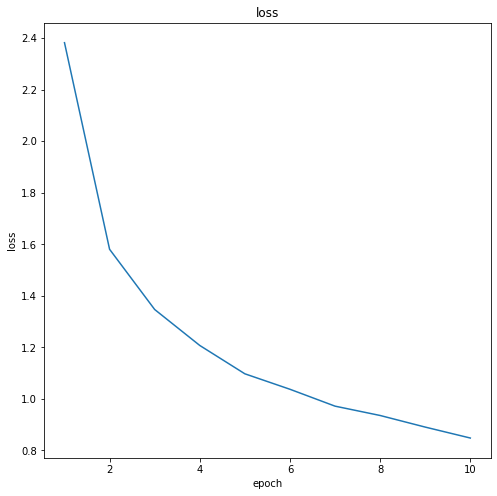

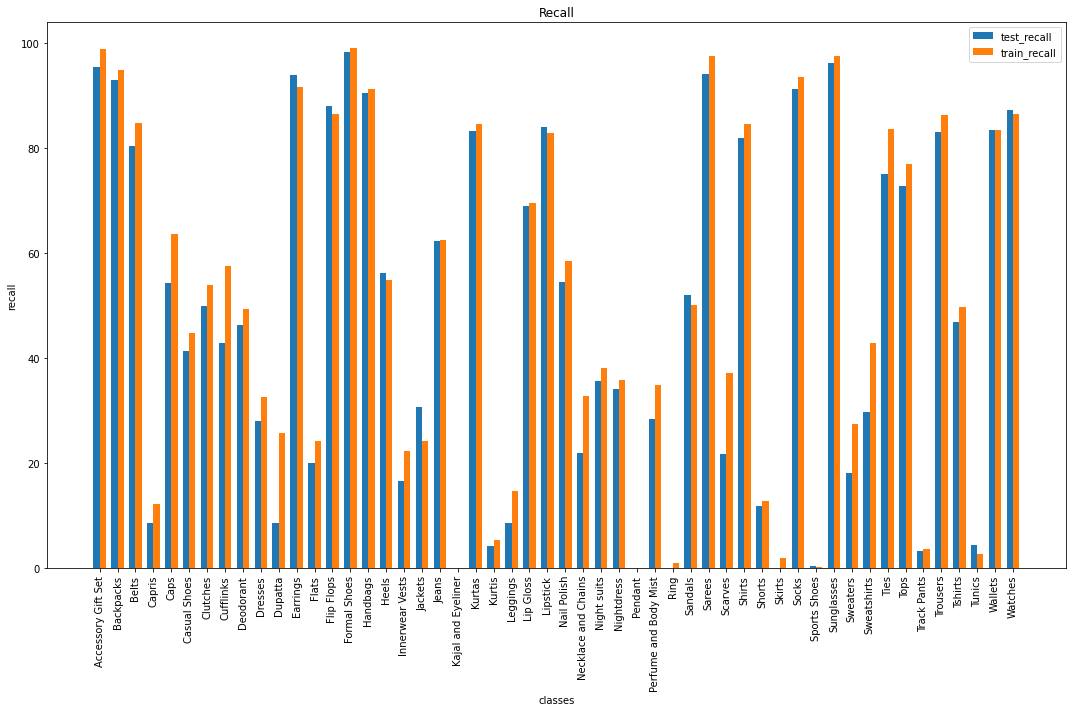

In [24]:
train_loader, test_loader = get_test_train_loader(dataset, batch_size=32)
evaluation(train_loader, test_loader, learning_rate=0.05)

### The influence of learning rate on $128$ batch size
When the batch size gets bigger, it is more efficient to have bigger steps as well. So a larger learning rate may be needed in this case. The results of examining a batch size of 128 with learning rates of $0.001$, $0.01$, and $0.1$ have shown below. Based on these results, it has been shown that the bigger learning rate(0.1) has done a much better work on classifying than the lower learning rate(0.001).

epoch 1, train_loss: 3.085, time elapsed: 70.546939 seconds
epoch 2, train_loss: 2.360, time elapsed: 71.283824 seconds
epoch 3, train_loss: 1.986, time elapsed: 70.927848 seconds
epoch 4, train_loss: 1.943, time elapsed: 71.470595 seconds
epoch 5, train_loss: 1.702, time elapsed: 71.214296 seconds
epoch 6, train_loss: 1.455, time elapsed: 71.442364 seconds
epoch 7, train_loss: 1.372, time elapsed: 71.423745 seconds
epoch 8, train_loss: 1.281, time elapsed: 71.41567 seconds
epoch 9, train_loss: 1.224, time elapsed: 71.250939 seconds
epoch 10, train_loss: 1.148, time elapsed: 71.28192 seconds
total training time: 11.871 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 65.59951676230746|64.12080536912751|


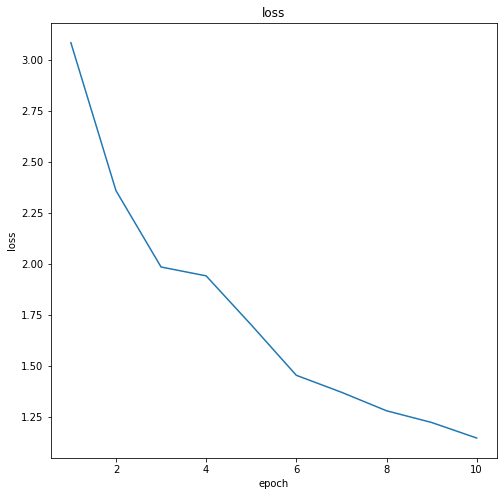

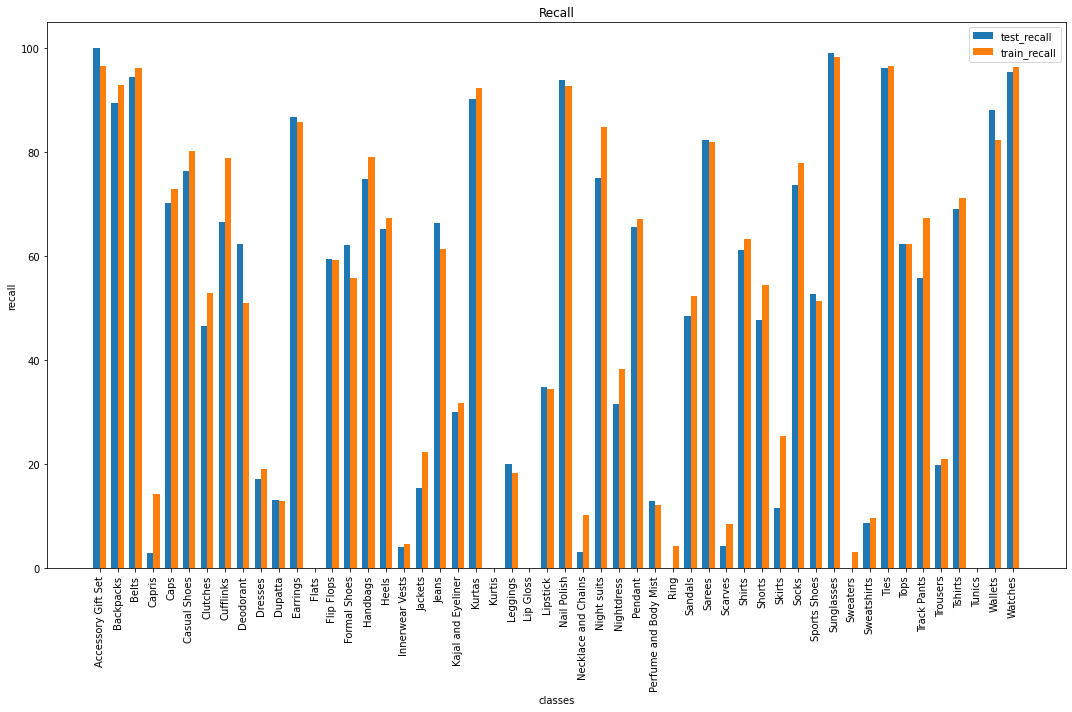

In [25]:
train_loader, test_loader = get_test_train_loader(dataset, batch_size=128)
evaluation(train_loader, test_loader, learning_rate=0.1)

epoch 1, train_loss: 3.488, time elapsed: 71.324711 seconds
epoch 2, train_loss: 2.940, time elapsed: 71.680631 seconds
epoch 3, train_loss: 2.522, time elapsed: 71.940626 seconds
epoch 4, train_loss: 2.203, time elapsed: 71.549574 seconds
epoch 5, train_loss: 1.978, time elapsed: 71.798221 seconds
epoch 6, train_loss: 1.818, time elapsed: 71.718251 seconds
epoch 7, train_loss: 1.697, time elapsed: 71.75338 seconds
epoch 8, train_loss: 1.599, time elapsed: 72.153125 seconds
epoch 9, train_loss: 1.537, time elapsed: 71.970664 seconds
epoch 10, train_loss: 1.487, time elapsed: 71.788751 seconds
total training time: 11.961 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 53.813886372025905|54.0|


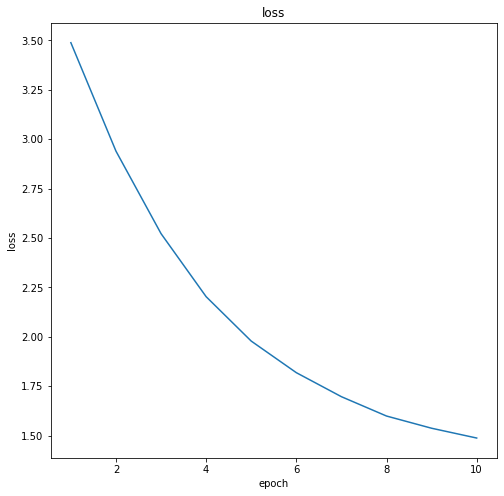

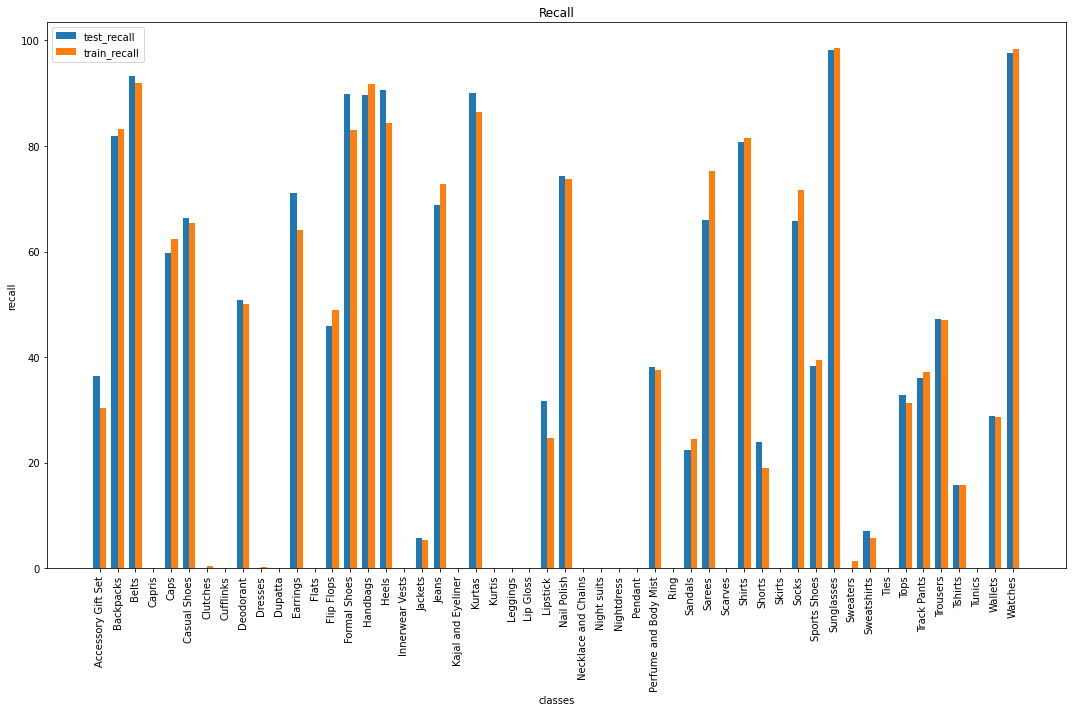

In [26]:
train_loader, test_loader = get_test_train_loader(dataset, batch_size=128)
evaluation(train_loader, test_loader, learning_rate=0.01)

epoch 1, train_loss: 3.889, time elapsed: 71.218124 seconds
epoch 2, train_loss: 3.698, time elapsed: 71.395779 seconds
epoch 3, train_loss: 3.502, time elapsed: 71.415197 seconds
epoch 4, train_loss: 3.451, time elapsed: 71.373783 seconds
epoch 5, train_loss: 3.429, time elapsed: 71.319249 seconds
epoch 6, train_loss: 3.411, time elapsed: 71.607432 seconds
epoch 7, train_loss: 3.391, time elapsed: 71.672779 seconds
epoch 8, train_loss: 3.366, time elapsed: 71.768479 seconds
epoch 9, train_loss: 3.332, time elapsed: 71.787641 seconds
epoch 10, train_loss: 3.284, time elapsed: 71.627226 seconds
total training time: 11.920 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 18.597939528172088|18.590604026845636|


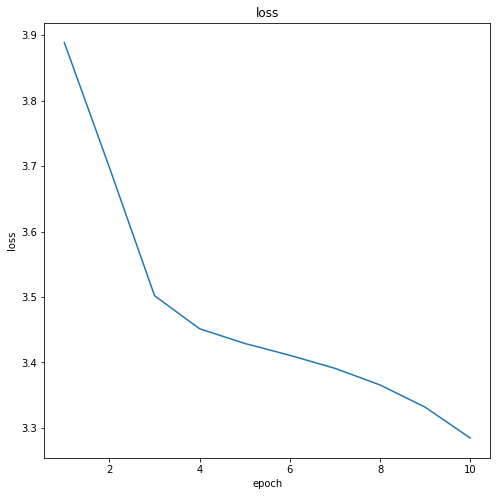

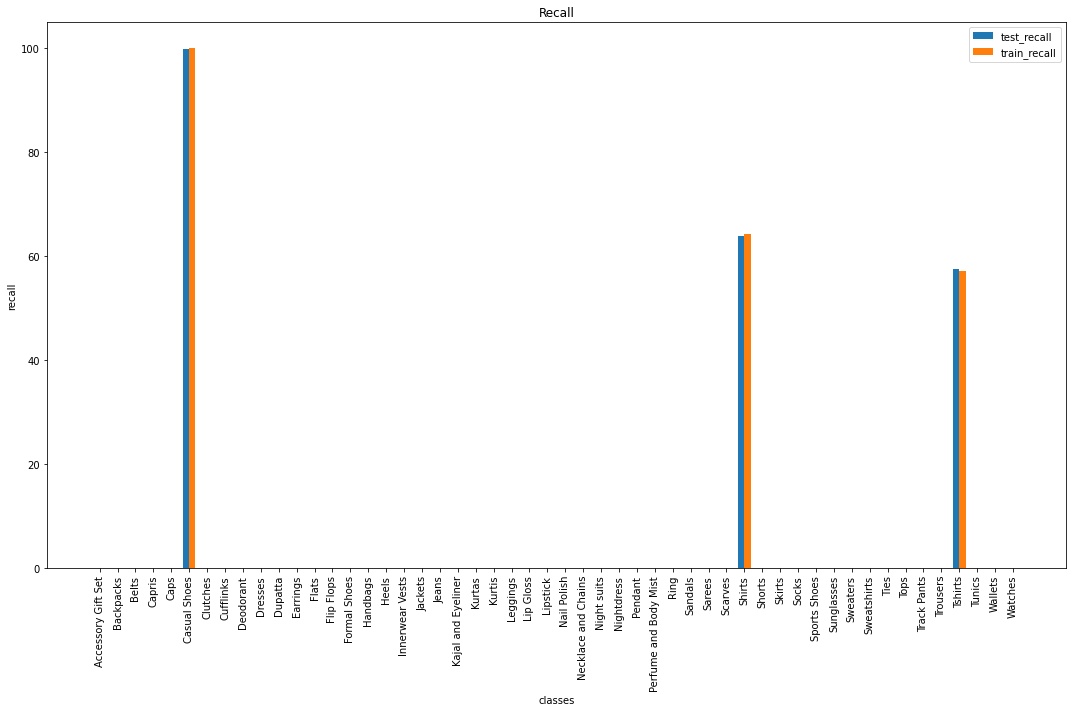

In [27]:
evaluation(train_loader, test_loader, learning_rate=0.001)

## Part Eight
### What is momentum?
> Momentum is a very popular technique which is being used beside SGD method. It suggests that instead of using gradients alone, accumulate the gradient of the past steps as well, and then, determine the direction to go.
> <br>
> $$ V_{t+1} = \mu \times V_{t} + g_{t+1} $$
> $$ W_{t+1} = W_{t} - learning \ rate \times  V_{t+1} $$
> Where $\mu$ is momentum value, $W$ indicates the weights, $g$ indicates gradient, and $v$ is velocity.
> <br> <br>
> 
### SGD with momentum, pros and cons
> SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. As the data given to SGD is divided into batches, the chosen direction is not always the best or even correct answer. To prevent the system from going into a wrong direction, momentum helps it by accumulating the direction with the former one. <br>
>  On a more negative nore, if the momentum term is too much, we will most likely miss the local minima, rolling past it, but then rolling backwards, missing it again. 
> <br>
>
### Is it always better to increase the momentum parameter? 
> As it was said back in the pros and cons of momentum, if the momentum is too much, we could just swing back and forward between the local minima.
> <br>
> It is also possible that as the momentum gets close to 1, the effect of the gradient term will be ignored.
> <br>
> 

The following code is showing the results of having $[0.5, 0.9, 0.98]$ values for momentum parameter in SGD optimization. As the results show, the more the momentum parameter, the less the accuracy.
<br>
It can be seen that with the momentum of $0.98$, the loss value would be *nan* due to the high value of momentum, the weights will be high; hence, the loss will be too high and it wil convert into *nan* value.

#### $momentum = 0.5$

In [28]:
train_loader, test_loader = get_test_train_loader(dataset, batch_size=64)

epoch 1, train_loss: 2.479, time elapsed: 125.155546 seconds
epoch 2, train_loss: 1.611, time elapsed: 125.429483 seconds
epoch 3, train_loss: 1.394, time elapsed: 127.440607 seconds
epoch 4, train_loss: 1.230, time elapsed: 125.034608 seconds
epoch 5, train_loss: 1.123, time elapsed: 125.248477 seconds
epoch 6, train_loss: 1.063, time elapsed: 128.141444 seconds
epoch 7, train_loss: 1.000, time elapsed: 124.948932 seconds
epoch 8, train_loss: 0.950, time elapsed: 124.967583 seconds
epoch 9, train_loss: 0.904, time elapsed: 125.334621 seconds
epoch 10, train_loss: 0.869, time elapsed: 125.606067 seconds
total training time: 20.955 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 72.1198697942884|69.47651006711409|


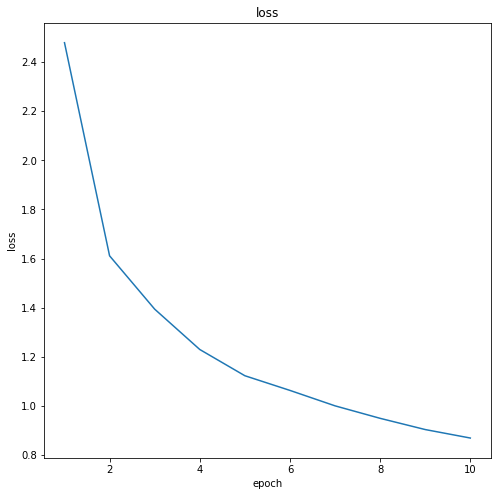

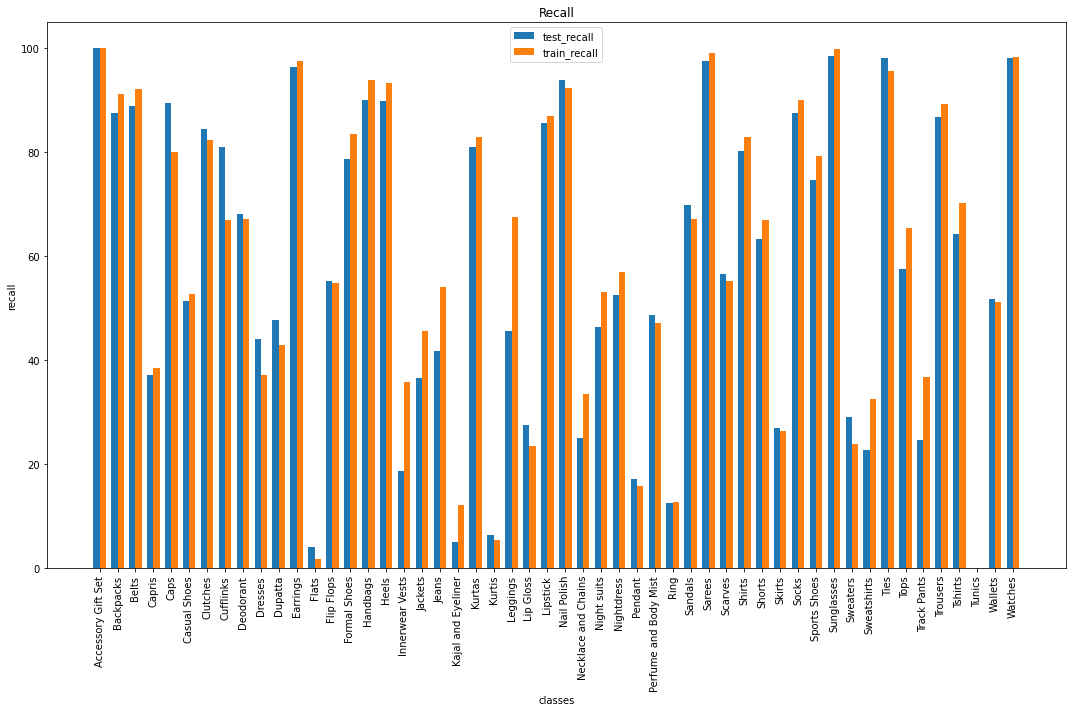

In [29]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5)

#### $momentum = 0.9$

epoch 1, train_loss: 3.188, time elapsed: 123.992348 seconds
epoch 2, train_loss: 2.790, time elapsed: 124.067588 seconds
epoch 3, train_loss: 2.248, time elapsed: 124.096095 seconds
epoch 4, train_loss: 2.070, time elapsed: 123.678793 seconds
epoch 5, train_loss: 2.001, time elapsed: 123.741325 seconds
epoch 6, train_loss: 2.006, time elapsed: 123.728038 seconds
epoch 7, train_loss: 2.146, time elapsed: 124.021588 seconds
epoch 8, train_loss: 1.999, time elapsed: 124.033055 seconds
epoch 9, train_loss: 2.083, time elapsed: 123.889382 seconds
epoch 10, train_loss: 2.114, time elapsed: 123.599824 seconds
total training time: 20.647 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 37.669049296956274|37.328859060402685|


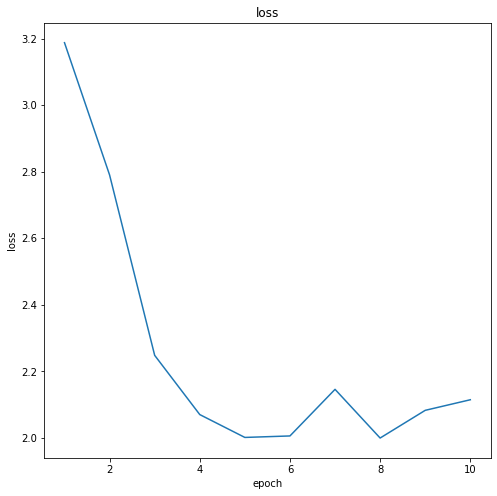

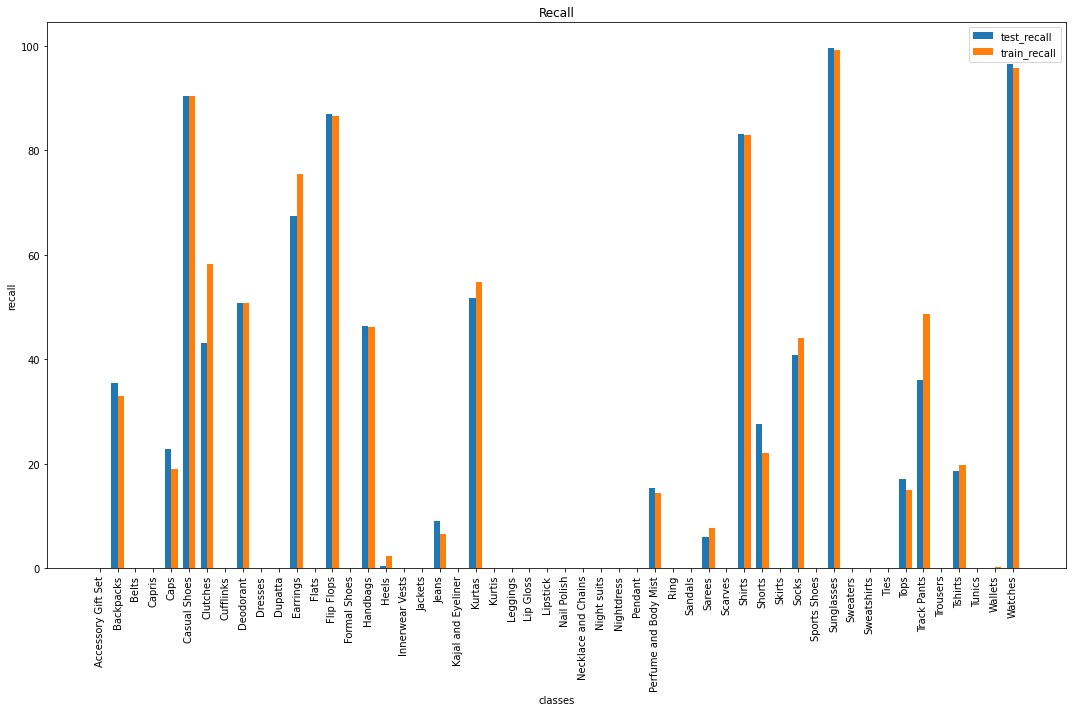

In [30]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.9)

#### $momentum = 0.98$

epoch 1, train_loss: nan, time elapsed: 123.524376 seconds
epoch 2, train_loss: nan, time elapsed: 123.562662 seconds
epoch 3, train_loss: nan, time elapsed: 123.760915 seconds
epoch 4, train_loss: nan, time elapsed: 123.702139 seconds
epoch 5, train_loss: nan, time elapsed: 123.744554 seconds
epoch 6, train_loss: nan, time elapsed: 123.732964 seconds
epoch 7, train_loss: nan, time elapsed: 123.552199 seconds
epoch 8, train_loss: nan, time elapsed: 123.814254 seconds
epoch 9, train_loss: nan, time elapsed: 123.593248 seconds
epoch 10, train_loss: nan, time elapsed: 123.643131 seconds
total training time: 20.611 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 0.29866774052820566|0.2953020134228188|


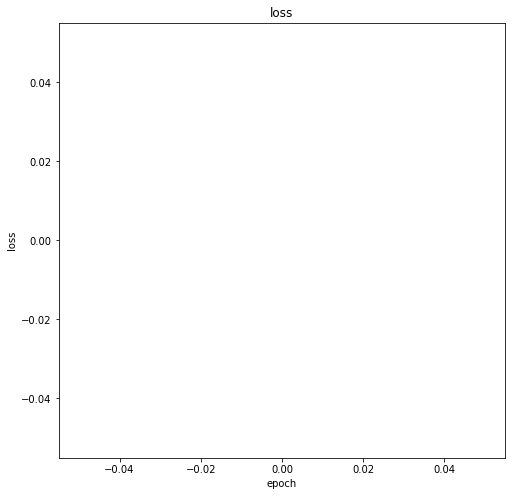

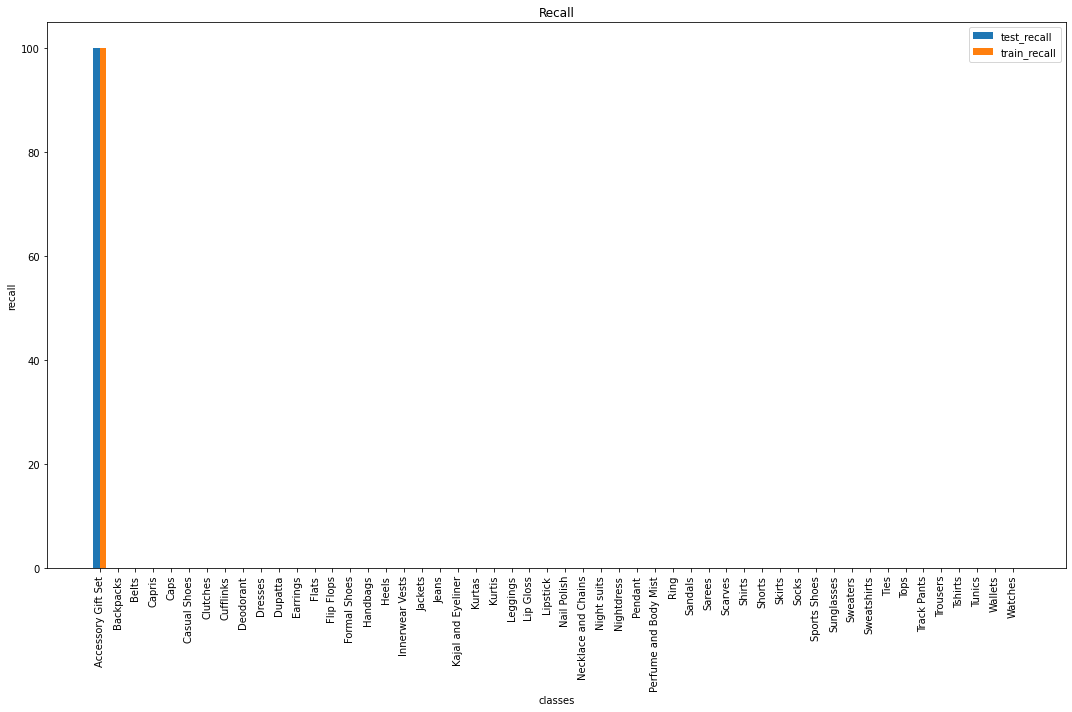

In [31]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.98)

## Part Nine

### Considering 20 epochs instead of 10
> The results of doing so have been shown below. It can be seen that using 20 epochs makes the model more accurate with the effect of having less generalization.
### Why more than one epoch?
> The SGD algorithm is iterative means that we need to get the results multiple times to get the most optimal result. The iterative quality of the gradient descent helps a underfitted model to make the model fit optimally to the data. In another words, as the number of epochs increases, the curve goes from underfitting to optimal to overfitting curve. <br>
> So it is needed to iterate the data more than once and iterate it multiple times(meaning we need to have more than one epoch).
### Do more epochs indicate better results?
> Obviously no. The thing is that when the number of epochs are too low, the model will not explore the dataset enough to learn it well. Hence, the result will be underfitted. Adequate number of epoch will indicate an acceptable accuracy which shows a quite balanced model. The important part is that if we choose a large number of epochs for a model, this will make the model ecplore the data frequently enough to even learn the noises and as a result, the mode lwill overfit the train data.
> <br>
>


epoch 1, train_loss: 2.403, time elapsed: 124.830841 seconds
epoch 2, train_loss: 1.613, time elapsed: 124.813783 seconds
epoch 3, train_loss: 1.363, time elapsed: 125.036026 seconds
epoch 4, train_loss: 1.211, time elapsed: 125.154428 seconds
epoch 5, train_loss: 1.110, time elapsed: 124.961694 seconds
epoch 6, train_loss: 1.034, time elapsed: 124.803142 seconds
epoch 7, train_loss: 1.000, time elapsed: 125.066367 seconds
epoch 8, train_loss: 0.947, time elapsed: 125.030279 seconds
epoch 9, train_loss: 0.892, time elapsed: 124.908592 seconds
epoch 10, train_loss: 0.855, time elapsed: 125.760758 seconds
epoch 11, train_loss: 0.826, time elapsed: 125.906231 seconds
epoch 12, train_loss: 0.801, time elapsed: 125.883363 seconds
epoch 13, train_loss: 0.775, time elapsed: 125.78763 seconds
epoch 14, train_loss: 0.740, time elapsed: 125.771831 seconds
epoch 15, train_loss: 0.723, time elapsed: 125.785974 seconds
epoch 16, train_loss: 0.703, time elapsed: 125.861893 seconds
epoch 17, train_lo

| Train Accuracy | Test Accuracy |
|---|---|
| 79.49595624014229|75.02013422818791|


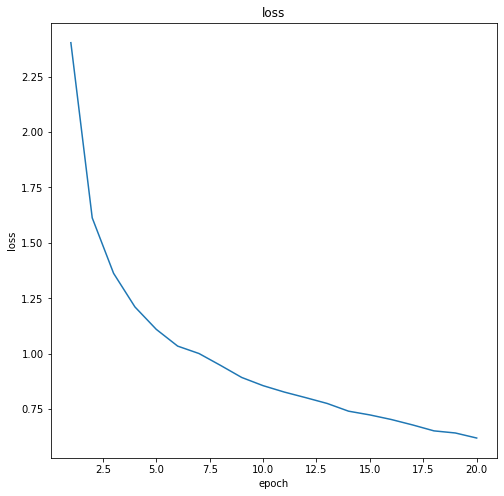

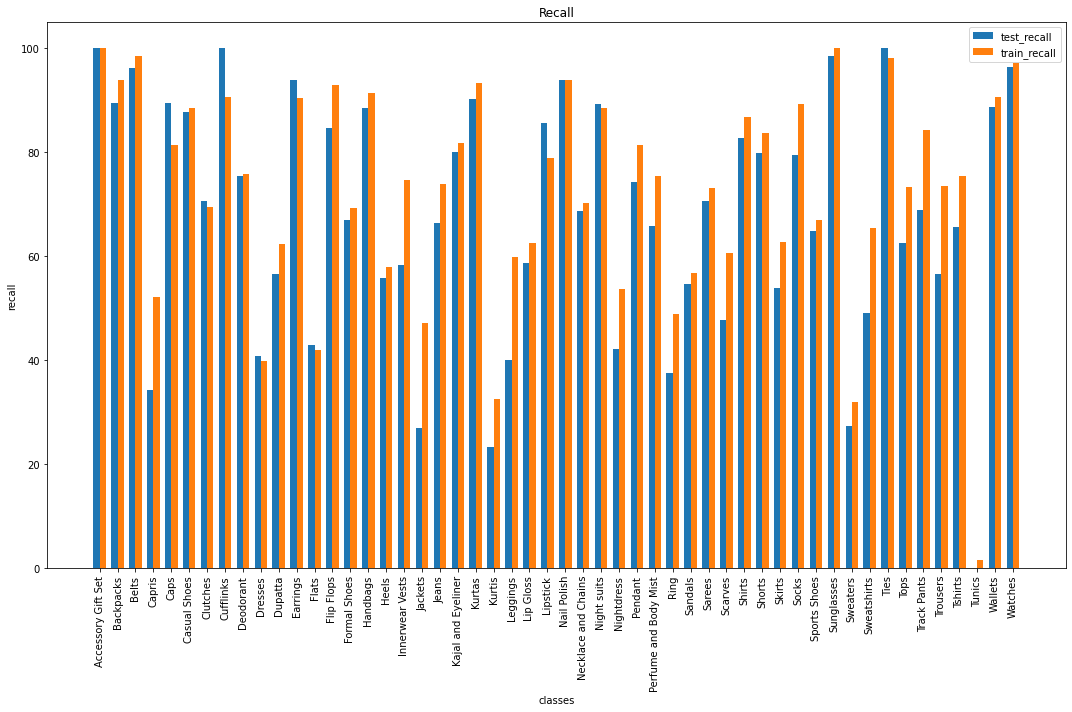

In [32]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5, num_epochs=20)

## Part Ten
 *  **Leaky Relu** <br>
Leaky Relu attempts to fix the “dying ReLU” problem. Instead of the function being zero when x < 0, a Leaky Relu gives a small negative slope. <br>
> The results of using this activation function have been shown below. It can be obtained that the *RELU* function works better than the *Leaky* *RELU*.
  

epoch 1, train_loss: 2.405, time elapsed: 126.014945 seconds
epoch 2, train_loss: 1.723, time elapsed: 126.070161 seconds
epoch 3, train_loss: 1.402, time elapsed: 126.455393 seconds
epoch 4, train_loss: 1.290, time elapsed: 126.203496 seconds
epoch 5, train_loss: 1.149, time elapsed: 126.399592 seconds
epoch 6, train_loss: 1.071, time elapsed: 126.370084 seconds
epoch 7, train_loss: 0.997, time elapsed: 126.339645 seconds
epoch 8, train_loss: 0.955, time elapsed: 126.260211 seconds
epoch 9, train_loss: 0.907, time elapsed: 126.380715 seconds
epoch 10, train_loss: 0.871, time elapsed: 126.38926 seconds
total training time: 21.048 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 71.26413638041545|69.51677852348993|


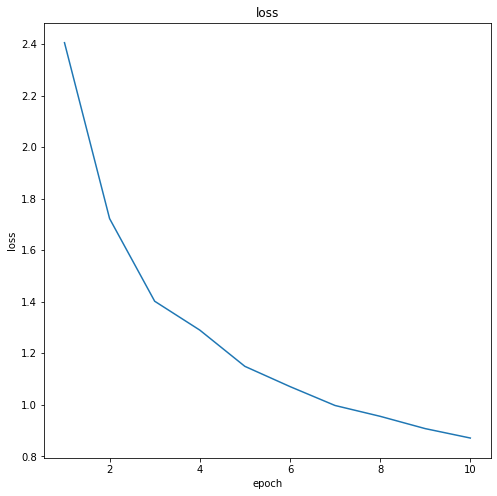

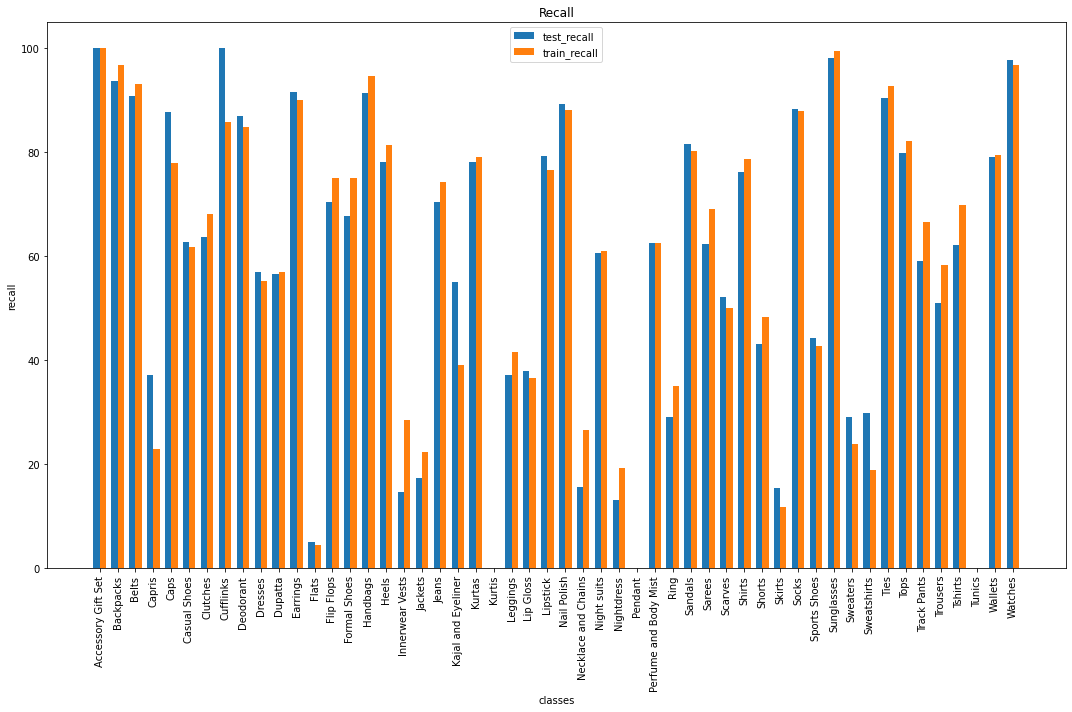

In [33]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5, act=F.leaky_relu)

* **tanh**
> This activation function is bounding the input to $(-1, 1)$. This function has the vanishing gradient problem as well(having a fix value and thus, its gradient will turn into zero). <br>
> The results of using this activation function have been shown below. It can be obtained that this activation function works better than the *RELU* function and the accuracy has been increased significantly.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1, train_loss: 1.882, time elapsed: 126.169732 seconds
epoch 2, train_loss: 1.303, time elapsed: 126.324152 seconds
epoch 3, train_loss: 1.161, time elapsed: 126.255398 seconds
epoch 4, train_loss: 1.068, time elapsed: 126.261927 seconds
epoch 5, train_loss: 0.991, time elapsed: 126.455418 seconds
epoch 6, train_loss: 0.933, time elapsed: 126.109196 seconds
epoch 7, train_loss: 0.889, time elapsed: 126.086437 seconds
epoch 8, train_loss: 0.845, time elapsed: 126.36383 seconds
epoch 9, train_loss: 0.810, time elapsed: 126.328215 seconds
epoch 10, train_loss: 0.785, time elapsed: 126.416492 seconds
total training time: 21.046 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 75.55958253632672|72.49664429530202|


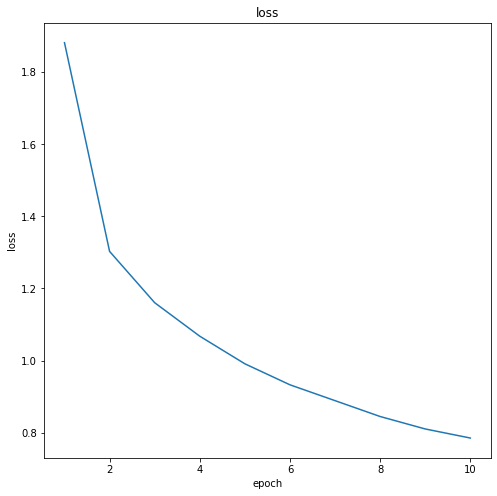

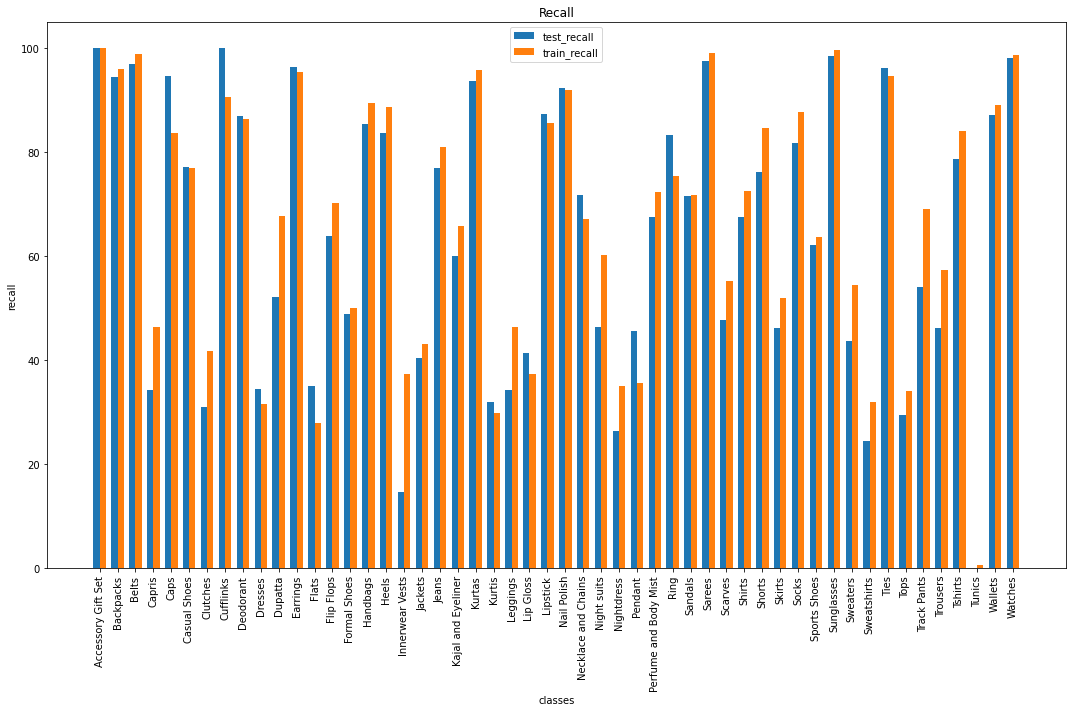

In [34]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5, act=F.tanh)

## Part Eleven

### Regularizer Term Prevents Overfitting from Happening
>  Overfitting can be interpreted that your model fits the dataset so well, which it seems to memorize the data we showed rather than actually learn from it. Intuitively, having large coefficients can be seen as evidence of memorizing the data. To prevent this from happening, without omitting any of the parameters, we can use regularization.
> $$L_{reg}=\frac{\lambda}{2}||W_2||^2 $$
> By adding this cost to the total cost being calculated each time, the value of the weights will have an important role in minimizing the loss function. Hence, the value of parameters would not be that high and as a result, the chance of overfitting will be lowered.
> <br>
> 
### Weight Decay Parameter
> According to the equations explained below, the weight decay parameter has an equal role to the regularization term. If the value of the weights become too high, this parameter will show the changes in the final result. 
> $$Total \ loss = L + L_{reg} \to \nabla Total = \nabla L +\lambda W $$
> $$ W = W - learning \ rate \times \nabla Total$$
> $$ W -= \lambda \times learning \ rate \times W - learning \ rate \times \nabla L $$
> <br>

* $Weight \ decay = 0.1$
> The results are showing that a value of 0.1 for weight decay, is too high and it may cause some damages and decrease the accuracy.
> <br>

* $Weight \ decay = 0.01$
> The accuracy with this decay has been decreased in comparison with the results of part eigh. The point is that the weight decay parameter should be tunned carefully. In this problem, it can be seen that even 0.01 value is too high.
> <br>


epoch 1, train_loss: 3.454, time elapsed: 142.780385 seconds
epoch 2, train_loss: 3.384, time elapsed: 143.27753 seconds
epoch 3, train_loss: 3.378, time elapsed: 143.041694 seconds
epoch 4, train_loss: 3.379, time elapsed: 143.393959 seconds
epoch 5, train_loss: 3.376, time elapsed: 143.532537 seconds
epoch 6, train_loss: 3.373, time elapsed: 143.506877 seconds
epoch 7, train_loss: 3.382, time elapsed: 143.635176 seconds
epoch 8, train_loss: 3.377, time elapsed: 143.558545 seconds
epoch 9, train_loss: 3.375, time elapsed: 143.674909 seconds
epoch 10, train_loss: 3.380, time elapsed: 143.674894 seconds
total training time: 23.901 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 9.980200677875096|10.10738255033557|


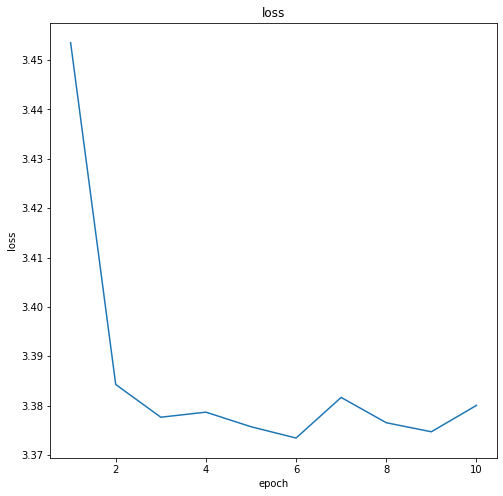

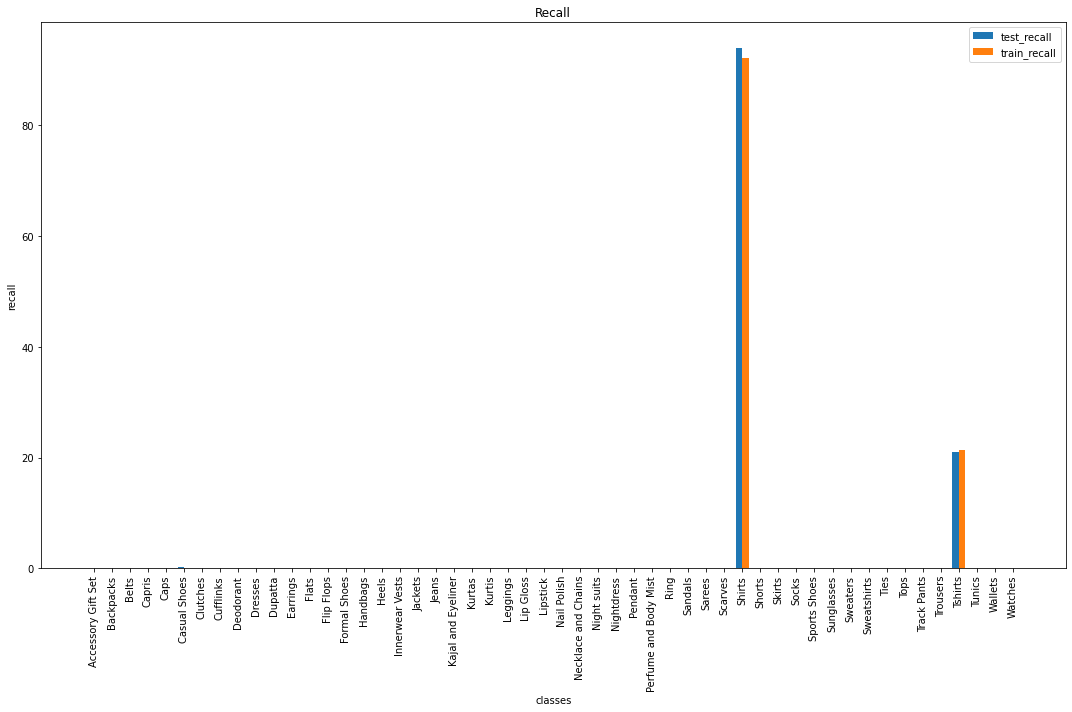

In [35]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5, weight_decay=0.1)

epoch 1, train_loss: 2.592, time elapsed: 143.195227 seconds
epoch 2, train_loss: 2.023, time elapsed: 143.478597 seconds
epoch 3, train_loss: 1.919, time elapsed: 143.721651 seconds
epoch 4, train_loss: 1.990, time elapsed: 143.435262 seconds
epoch 5, train_loss: 1.841, time elapsed: 143.315119 seconds
epoch 6, train_loss: 1.811, time elapsed: 142.800312 seconds
epoch 7, train_loss: 1.745, time elapsed: 142.967072 seconds
epoch 8, train_loss: 1.790, time elapsed: 142.852536 seconds
epoch 9, train_loss: 1.784, time elapsed: 142.79131 seconds
epoch 10, train_loss: 1.768, time elapsed: 142.810923 seconds
total training time: 23.856 minutes


| Train Accuracy | Test Accuracy |
|---|---|
| 42.38732843384006|42.36241610738255|


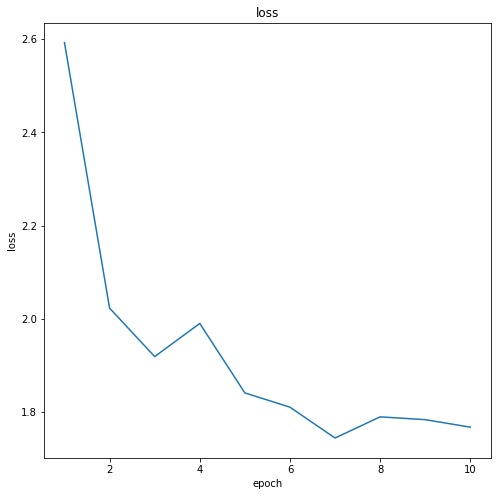

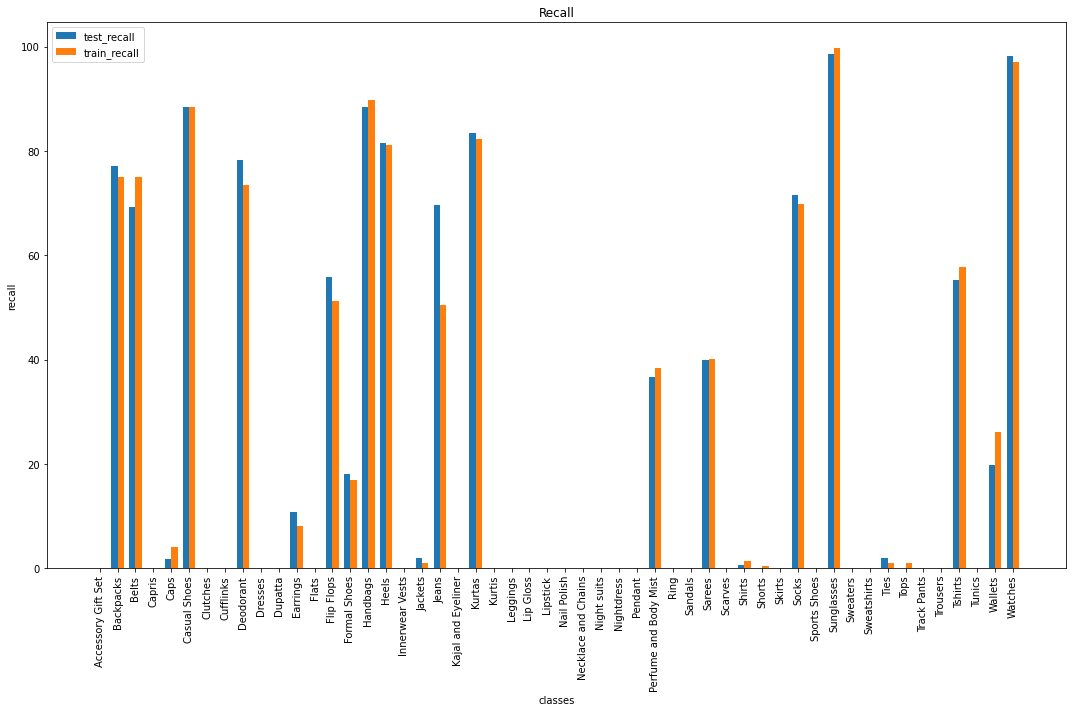

In [36]:
evaluation(train_loader, test_loader, learning_rate=0.05, momentum=0.5, weight_decay=0.01)